In [1]:
import islpy as isl
import islplot
from islplot.plotter import plot_set_points

# (Quasi) Affine Expressions 

An affine expression is recursively constructed from the following elements
Quasi-affine表达式, 即通过常量、变量以及对应基础操作构成的表达式.

**Base** 
- Constants ($(c_i)$) 
- Parameters ($(p_i)$) 
- Variables ($(v_i)$) 

**Operations** 
- Unary negation $( (-e) )$ 
- Addition $( ( e\_0 + e\_1 ) )$ 
- Multiplication by a constant $( (c * e) )$ 
- Constant division $( (e / c) )$ 
- Constant remainder $( (e \mod c) )$ 

### Examples 

#### Valid Expressions 

- 42 
- n, m 
- i, j 
- -i, 3 * i + 4 
- i / 2, i % 3 

#### Invalid Expressions 

- i * n, n * m 
- 5 / n, i % j 

# Presburger Formula 

A Presburger Formula is a boolean combination of comparisons between (Quasi) Affine Expressions. It is recursively constructed from the following elements: 
Presburger 公式就是affine表达式进行二元关系组合:

**Base** 
- Boolean constants (&#8868;, &#8869;) 

**Operations** 
- Comparisions between quasi-affine expressions 
  
  $(e0 \oplus e1, \oplus \in)$ $\{(<, \le, =, \ne, \ge, >) \}$ 

- Boolean operations between Presburger Formulas 
  
  $(e0 \otimes e1, \otimes \in)$ $\{(\land, \lor, not, \Rightarrow, \Leftarrow, \Leftrightarrow ) \}$ 

- Quantified variables 
  
  $( \exists x: p(x, ...) )$  
  
  $( \forall x: p(x, ...) )$  

### Examples 
#### Valid Expressions 

- $1 < 0$
- $(j + 3 \le 0 \land 0 \le n)$  

#### Invalid Expressions 
- 42 

# Presburger Sets 
A Presburger Set S, is a set of integer vectors described by a Presburger formula. It is formally described as a set S = $( \{ \vec{v} \mid \vec{v} \in \mathbb{Z}^n : p (\vec{v}, \vec{p})\} )$, where "p" is a Presburger Formular that evaluates to true, if a tuple $(\vec{v})$ is element of S.

Presburger 集合S, 是一个通过Presburger公式定义的整数向量集合. 通常$p$作为Presburger公式会被执行为true, 然后$(\vec{v})$则是集合包含的所有元素.

## Basic Set 

A Basic Set is the simplest form of a Presburger Set and allows only Presburger Formula that describe a single convex (but possibly sparse) set. 

The **space** of a set is defined by the dimensionality of the tuples it contains. A set containing pairs is called a two-dimensional space. Spaces can be **named**, which means a name is written in front of each tuple that allows to distinguish different spaces with identical dimensionality. 

集合的**space**被tuple的维度定义.一个集合包含pair被称为2维space. 

### Examples 

The following two basic sets **Triangle** and **Square** describe an upper-left triangle as well as a square. 

- Triangle: $(\{A[i,j] \mid 0 < i < j < 10\})$ 

- Square: $(\{ A[i,j] \mid 5 < i < 10 \land 0 < j < 5 \})$

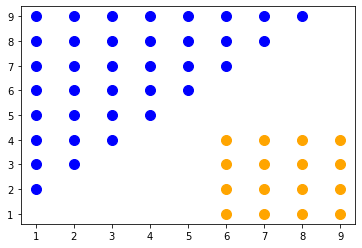

In [2]:
Triangle = isl.BasicSet("{A[i,j] : 0 < i < j < 10}")
Square = isl.BasicSet("{A[i,j] : 5 < i < 10 and 0 < j < 5}")
plot_set_points(Triangle,color='blue')
plot_set_points(Square,color='orange')

## Sparse Basic Sets 

In case the Presburger Formula describing the Basic Set contains modulo constraints, the set of points may become sparse.

这个例子中展示了集合中存在取模约束,这样集合元素会变成稀疏的.

### Example 
The basic set **Sparse** is a square where certain diagonals are excluded.

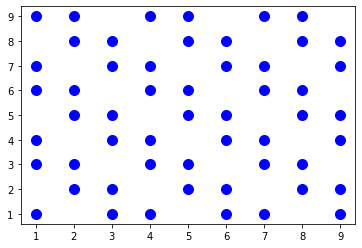

In [3]:
Sparse = isl.BasicSet("{A[i,j] : 0 < i,j < 10 and (i + j) % 3 != 0}")
plot_set_points(Sparse,color='blue')

## Exercises

a) Plot a set **UpperTriangle** with a base of width 7. 

```
       x
     x x x
   x x x x x
 x x x x x x x
```

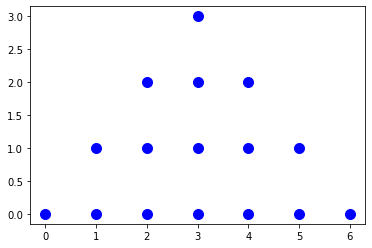

In [4]:
s = isl.BasicSet("{A[x,y] : 0 <= x < 7 and 0 <= y < 4 and y <= x < 7-y }")
plot_set_points(s,color='blue')

b) Plot a set **LowerTriangle** with a base of width 7 
```
x x x x x x x
  x x x x x
    x x x
      x
```

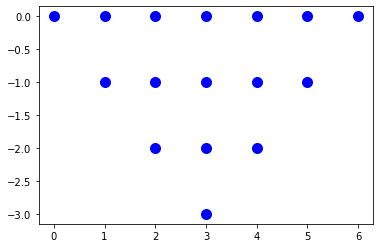

In [5]:
s = isl.BasicSet("{A[x,y] : 0 <= x < 7 and -4 < y <= 0 and  (-y) <= x < 7+y }")
plot_set_points(s,color='blue')

c) Plot a set **Diamond** with a width and height of 7. 
```
       x
     x x x
   x x x x x
 x x x x x x x
   x x x x x
     x x x
       x
```

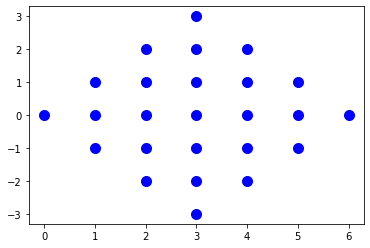

In [6]:
s = isl.BasicSet("{A[x,y] : 0 <= x < 7 and -4 < y < 4 and (-y) <= x < 7+y and y <= x < 7-y }")
plot_set_points(s,color='blue')

d) Plot a set **Parallelogram** with a height of 4 and a width of 7 with a slope of 1/2. 
```
      x x x x x x x
    x x x x x x x  
  x x x x x x x
x x x x x x x
```

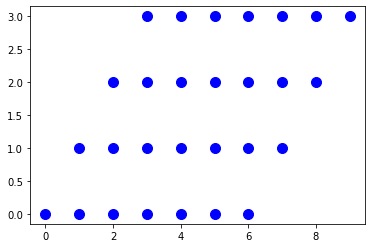

In [7]:
s = isl.BasicSet("{A[x,y] : 0 <= y < 4 and y <= x < y + 7 }")
plot_set_points(s,color='blue')

# Sets 
A set is a finite union of basic sets that all belong to the same named space. This means all basic sets have identical dimensionality and carry the same name. 

集合是有限的基础集合的联合, 他们都属于相同的named space中, 也就是他们的标识维度名都相同.


Combined: { A[i, j] : i > 0 and j <= 9 and (j > i or (6 <= i <= 9 and 0 < j <= 4)) }


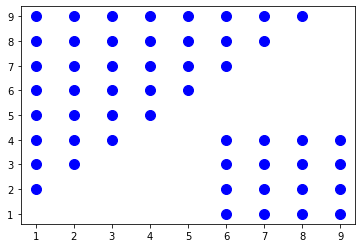

In [8]:
Combined = Triangle.union(Square)
print("Combined: " + str(Combined))
plot_set_points(Combined,color='blue')

# Union Set 

A union set is a finite union of sets that belong to differently named spaces.

不同named spaces的有限集合组成的是union set.

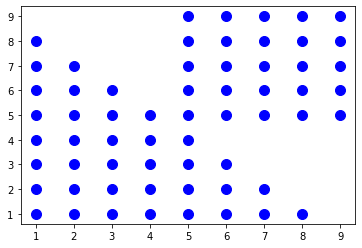

In [9]:
u = isl.UnionSet("{A[i,j] : 0 < i,j and  j + i < 10; B[i,j] : 5 <= i,j < 10 }")
plot_set_points(u,color='blue')

# Presburger Relations
A Presburger Map M, is a set of tuples of integer vectors described by a Presburger formula. It is formally described as a map M = $( \{ \vec{v_1} \to \vec{v\_2} \mid \vec{v\_1}, \vec{v\_2} \in \mathbb{Z}^n : p (\vec{v\_1}, \vec{v\_2}, \vec{p})\} )$, where "p" is a Presburger Formular that evaluates to true, if the pair of tuples $(\vec{v\_1})$ and $(\vec{v\_2})$ is element of M. 
Presburger Relations 是一种映射关系, 将多个Presburger formula描述的set映射起来.

## Basic Map 

A basic map relates two basic sets. The relations are simple enough to be described with a union of affine inequalities (and modulo constraints). 

basic map关联了basic set.

### Example

A simple relation that translates a basic set **A** to position **X**. 
比如下面关联set A和position X.

Translate = $(\{A[i,j] \to X[i+10,j+1]\})$

To visualize this set, we use it to translate the earlier defined set **Triangle**. Without constraining **Translate** to **Triangle** the map is infinite and cannot be rendered.

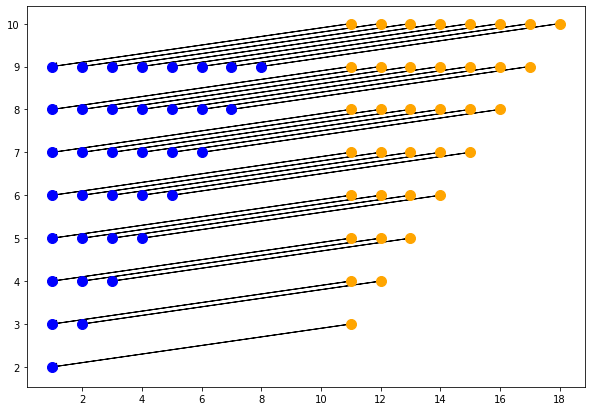

In [10]:
from islplot.plotter import *
Translate = isl.BasicMap("{A[i,j] -> X[i+10,j+1]}")
b  = Triangle.apply(Translate)
Translate = Translate.intersect_domain(Triangle)

plot_map(Translate)
plot_set_points(Triangle,color='blue')
plot_set_points(b,color='orange')